**AIML Online Capstone - Pneumonia Detection Challenge**

* Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. 
* It requires review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams.



**Pneumonia Detection Project**

* To build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, algorithm needs to automatically locate lung opacities on chest radiographs.
* Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box.





**Loading Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Uploading Files**
* This block will extract all the files to the current working directory. You should be seeing the list of all files inside the zip files as the output of this block after the final `!ls` command is executed. 

In [2]:
files_zip_path= "/content/drive/My Drive/cap/rsna-pneumonia-detection-challenge.zip"

import zipfile

# This extracts the filesto the current working directory
archive=zipfile.ZipFile(files_zip_path,'r')
archive.extractall()
!ls

 drive				        stage_2_sample_submission.csv
'GCP Credits Request Link - RSNA.txt'   stage_2_test_images
 sample_data			        stage_2_train_images
 stage_2_detailed_class_info.csv        stage_2_train_labels.csv


**Importing and installing required libraries**

In [0]:
# installing pydicom for processing *.dcm files
!pip3 install -q pydicom

In [0]:
# importing libraries for loading images
import os
import glob
import pandas as pd

In [5]:
# checking current working directory
print('Current working directory:',os.getcwd())
# checking files and folders in current directory
print('Folder and Files in current directory:',os.listdir())

Current working directory: /content
Folder and Files in current directory: ['.config', 'drive', 'stage_2_train_labels.csv', 'stage_2_detailed_class_info.csv', 'stage_2_sample_submission.csv', 'GCP Credits Request Link - RSNA.txt', 'stage_2_test_images', 'stage_2_train_images', 'sample_data']


**load the images extracted from folder stage_2_train_images**

In [0]:
image_path='/content/stage_2_train_images'

In [0]:
# defining function to create metadata which will be list of pathname and *.dcm file

def load_metadata(path):
  metadata=glob.glob(path+'/' +'*.dcm') # glob is used to find pathname for dcm files
  return list(set(metadata))

# creating metadata
metadata=load_metadata(image_path)

In [8]:
# checking size of metadata
print('Size of metadata is:',len(metadata))

# checking first element of metadata 
print('First image in metadata is:',metadata[0])

Size of metadata is: 26684
First image in metadata is: /content/stage_2_train_images/37af3cbd-73c4-473d-bda7-5445d4cc6da9.dcm


In [9]:
# Reading csv file for Patient Id, Bounding Box co-ordinates and Target value
data_labels=pd.read_csv('stage_2_train_labels.csv')
data_labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [0]:
# Creating Copy of Dataset and adding additional column for File Path to Map images and Bounding Box File

import copy
import numpy as np
data_labels1=copy.deepcopy(data_labels)
data_labels1['PathName']=np.nan

In [11]:
data_labels1.head()

,patientId,x,y,width,height,Target,PathName
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,NaN
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,NaN
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,NaN
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,NaN
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,NaN


In [12]:
type(data_labels1)

pandas.core.frame.DataFrame

In [0]:
# to create bounding box we need to map data lables with images

# defining a function to create dictionary for mapping data_labels with images

def addition_path(data_labels1): 
  for i in range(len(data_labels1)):
    data_labels1['PathName'][i]=os.path.join(image_path,data_labels1['patientId'][i]+'.dcm')
  return data_labels1

In [14]:
data_labels1=addition_path(data_labels1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
data_labels1.drop(['patientId'],axis=1)

,x,y,width,height,Target,PathName
0,NaN,NaN,NaN,NaN,0,/content/stage_2_train_images/0004cfab-14fd-4e...
1,NaN,NaN,NaN,NaN,0,/content/stage_2_train_images/00313ee0-9eaa-42...
2,NaN,NaN,NaN,NaN,0,/content/stage_2_train_images/00322d4d-1c29-49...
3,NaN,NaN,NaN,NaN,0,/content/stage_2_train_images/003d8fa0-6bf1-40...
4,264.0,152.0,213.0,379.0,1,/content/stage_2_train_images/00436515-870c-4b...
...,...,...,...,...,...,...
30222,185.0,298.0,228.0,379.0,1,/content/stage_2_train_images/c1ec14ff-f6d7-4b...
30223,NaN,NaN,NaN,NaN,0,/content/stage_2_train_images/c1edf42b-5958-47...
30224,NaN,NaN,NaN,NaN,0,/content/stage_2_train_images/c1f6b555-2eb1-42...
30225,570.0,393.0,261.0,345.0,1,/content/stage_2_train_images/c1f7889a-9ea9-4a...


In [0]:
data_labels1=data_labels1[['PathName','x','y','width','height','Target']]

In [17]:
data_labels1.head()

,PathName,x,y,width,height,Target
0,/content/stage_2_train_images/0004cfab-14fd-4e...,NaN,NaN,NaN,NaN,0
1,/content/stage_2_train_images/00313ee0-9eaa-42...,NaN,NaN,NaN,NaN,0
2,/content/stage_2_train_images/00322d4d-1c29-49...,NaN,NaN,NaN,NaN,0
3,/content/stage_2_train_images/003d8fa0-6bf1-40...,NaN,NaN,NaN,NaN,0
4,/content/stage_2_train_images/00436515-870c-4b...,264.0,152.0,213.0,379.0,1


In [18]:
type(data_labels1)

pandas.core.frame.DataFrame

**Creating Dictionary**

In [0]:
label_data=data_labels1.groupby(['PathName'])[['x','y','width','height','Target']].apply(lambda x:x.values.tolist()).to_dict()

**Validating Dictionary**

In [21]:
label_data.get('/content/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm')

[[nan, nan, nan, nan, 0.0]]

In [22]:
x=label_data.get('/content/stage_2_train_images/32408669-c137-4e8d-bd62-fe8345b40e73.dcm')
x

[[273.0, 856.0, 234.0, 101.0, 1.0],
 [702.0, 801.0, 249.0, 144.0, 1.0],
 [300.0, 367.0, 226.0, 423.0, 1.0],
 [706.0, 360.0, 232.0, 238.0, 1.0]]

In [23]:
metadata[0]

'/content/stage_2_train_images/37af3cbd-73c4-473d-bda7-5445d4cc6da9.dcm'

**Validating size of metadata vs label_data**

In [24]:
print('Size of metadata is:',len(metadata))
print('Size of data labels is:',len(label_data))

Size of metadata is: 26684
Size of data labels is: 26684


**from above output we can validate that all patient data labels have been grouped as per requirement**

**Plotting an image**

In [0]:
import matplotlib.pyplot as plt
import pydicom
import cv2

Original Image Size of DCM images is: 1024 x 1024


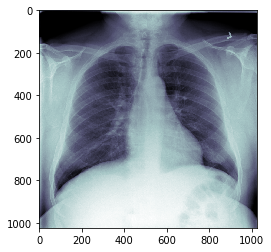

In [26]:
img=pydicom.dcmread(metadata[0])
if 'PixelData' in img:
    rows = int(img.Rows)
    cols = int(img.Columns)
    print("Original Image Size of DCM images is: {rows:d} x {cols:d}".format(rows=rows, cols=cols))
plt.imshow(img.pixel_array,cmap=plt.cm.bone)
plt.show()

In [27]:
img

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.5693.1517874317.643326
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: '37af3cbd-73c4-473d-bda7-5445d4cc6da9'
(0010, 0020) Patient ID                          LO: '37af3cbd-73c4-473d-bda7-5445d4cc6da9'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's

**(0028,0002) Sample per Pixel**
* Sample per pixel defines the number of color channels which is set to 1 meaning image has single Gray Channel

In [0]:
# creating Bounding box on images

# finding number of times image exists in bounding box data file
def get_count(pathname,data_lab):
  count_label=0
  if pathname in label_data:
      count_label=len(data_lab.get(pathname))  
  return count_label

# function to get image
def get_image(pathname,met_data):
  for i in range(len(met_data)):
    if met_data[i]==pathname:
      img=pydicom.dcmread(met_data[i]) 
      imag=img.pixel_array
  return imag


# function to draw bounding Box on images
def get_bb(imag,data_lab):
  if pathname in data_lab:
    data= data_lab.get(pathname)
    count=len(data)
    for i in range(count):
      if data[i][4]==1:
        x= int(data[i][0])
        y= int(data[i][1])                                                     
        w= int(data[i][2])
        h= int(data[i][3])
        bb=cv2.rectangle(imag,(x,y),(x+w,y+h),(255,0,0),3)
        plt.imshow(bb,cmap=plt.cm.bone)
      elif data[i][4]==0:
        plt.imshow(imag,cmap=plt.cm.bone)    

12507
File path for accessing Image: /content/stage_2_train_images/02c34d5b-16e9-412e-a385-ccd8cbceae16.dcm
Number of times Pateint Id exists in bounding box data: 2


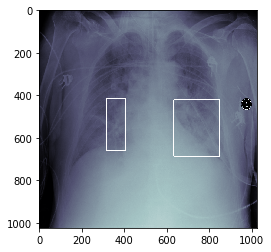

In [74]:
for i in range(len(metadata)):
  if metadata[i]=='/content/stage_2_train_images/02c34d5b-16e9-412e-a385-ccd8cbceae16.dcm':
    print(i)

pathname=metadata[12507]
number_bb=get_count(pathname,label_data)
print("File path for accessing Image:",metadata[12507])
print("Number of times Pateint Id exists in bounding box data:",number_bb)
img=get_image(pathname,metadata)
get_bb(img,label_data)

15434
File path for accessing Image: /content/stage_2_train_images/53e37b9f-3231-44e8-8bf1-56eaaa6e49c4.dcm
Number of times Pateint Id exists in bounding box data: 2


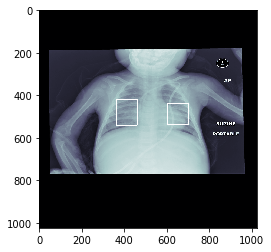

In [73]:
for i in range(len(metadata)):
  if metadata[i]=='/content/stage_2_train_images/01fa0f5e-00c3-41cb-b5c7-10600c8633ae.dcm':
    print(i)

pathname=metadata[15434]
number_bb=get_count(pathname,label_data)
print("File path for accessing Image:",metadata[15343])
print("Number of times Pateint Id exists in bounding box data:",number_bb)
img=get_image(pathname,metadata)
get_bb(img,label_data)

11085
File path for accessing Image: /content/stage_2_train_images/f95bd69c-d895-4f45-8ddc-8128431401b1.dcm
Number of times Pateint Id exists in bounding box data: 1


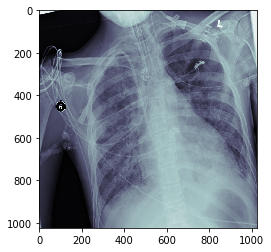

In [75]:
for i in range(len(metadata)):
  if metadata[i]=='/content/stage_2_train_images/32408669-c137-4e8d-bd62-fe8345b40e73.dcm':
    print(i)

pathname=metadata[11805]
number_bb=get_count(pathname,label_data)
print("File path for accessing Image:",metadata[11805])
print("Number of times Pateint Id exists in bounding box data:",number_bb)
img=get_image(pathname,metadata)
get_bb(img,label_data)

19459
File path for accessing Image: /content/stage_2_train_images/02b7b018-0fed-44c2-a9c2-93b2b3952efc.dcm
Number of times Pateint Id exists in bounding box data: 3


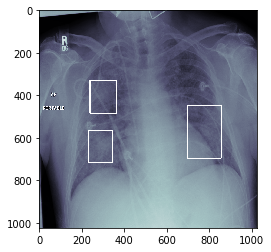

In [76]:
for i in range(len(metadata)):
  if metadata[i]=='/content/stage_2_train_images/02b7b018-0fed-44c2-a9c2-93b2b3952efc.dcm':
    print(i)

pathname=metadata[19459]
number_bb=get_count(pathname,label_data)
print("File path for accessing Image:",metadata[19459])
print("Number of times Pateint Id exists in bounding box data:",number_bb)
img=get_image(pathname,metadata)
get_bb(img,label_data)

**Resizing Image**

In [0]:
# function to resize images to build train,test and validation set
Image_width=512
Image_height=512
Num_channels=1

Orig_width=1024
Orig_height=1024

def resize_image(meta_data,data_lab):
  cropped_images=np.zeros((len(meta_data),Image_width,Image_height),dtype=np.float32)  
  for a in range(len(meta_data)):
    pathname=meta_data[a]
    img=pydicom.dcmread(pathname)
    img_pixel=img.pixel_array
    cropped_img=img_pixel[::2,::2]
    cropped_images[a]=cropped_img 
    if pathname in data_lab:
      data=data_lab.get(pathname)
      count=len(data)
      for i in range(count):
        if data[i][4]==1:
          x=int(data[i][0]*Image_width/Orig_width)
          y=int(data[i][1]*Image_height/Orig_height)                                                   
          w=int(data[i][2]*Image_width/Orig_width)
          h=int(data[i][3]*Image_height/Orig_height)
          cropped_images[a]=cv2.rectangle(cropped_images[a],(x,y),(x+w,y+h),(255,0,0),3)
        elif data[i][4]==0:
          cropped_images[a]=cropped_images[a]
  return cropped_images         

In [0]:
def get_target(meta_data,data_lab):
  target_var=np.zeros(len(meta_data))
  for a in range(len(meta_data)):
    if meta_data[a] in data_lab:
      data=data_lab.get(meta_data[a])
      count=len(data)
      for i in range(count):
        if data[i][4]==1:
          target_var[a]=int(data[i][4])
        elif data[i][4]==0:
          target_var[a]=int(data[i][4])
  return target_var

In [0]:
def get_dict(meta_d,lab_data):
  new_dict={}
  new_dict= {key:value for key, value in lab_data.items() if key in meta_d}
  return new_dict

**Creating Training, Test and Validation Set**

*   Filename to access images
*   File for Bounding Box



In [0]:
# creating training dataset
train_dataset=metadata[0:int(round(len(metadata)*0.5))]

In [0]:
# creating test dataset
test_dataset=metadata[int(round(len(metadata)*0.5)):int(round(len(metadata)*0.6))]

In [0]:
# creating Validation dataset
validation_dataset=metadata[int(round(len(metadata)*0.6)):int(round(len(metadata)*0.7))]

In [39]:
print(f'Size of Training dataset:{len(train_dataset)}')
print(f'Size of Test dataset:{len(test_dataset)}')
print(f'Size of Validation dataset:{len(validation_dataset)}')

Size of Training dataset:13342
Size of Test dataset:2668
Size of Validation dataset:2669


In [0]:
# creating training bounding Box dataset for image size 512x512
train_datalabel=get_dict(train_dataset,label_data)

In [0]:
# creating testing bounding Box dataset for image size 512x512
test_datalabel=get_dict(test_dataset,label_data)

In [0]:
# creating validation bounding Box dataset for image size 512x512
validation_datalabel=get_dict(validation_dataset,label_data)

In [44]:
print(f'Size of Training label:{len(train_datalabel)}')
print(f'Size of Test label:{len(test_datalabel)}')
print(f'Size of Validation label:{len(validation_datalabel)}')

Size of Training label:13342
Size of Test label:2668
Size of Validation label:2669


In [0]:
# creating resized images for training set
train_images=resize_image(train_dataset,train_datalabel)

In [0]:
# creating resized images for test set
test_images=resize_image(test_dataset,test_datalabel)

In [0]:
# creating resized images for vaidation set
validation_images=resize_image(validation_dataset,validation_datalabel)

In [50]:
print(f'Size of Training Images dataset:{len(train_images)}')
print(f'Size of Test Images dataset:{len(test_images)}')
print(f'Size of Validation Images dataset:{len(validation_images)}')

Size of Training Images dataset:13342
Size of Test Images dataset:2668
Size of Validation Images dataset:2669


In [0]:
train_target=get_target(train_dataset,train_datalabel)

In [0]:
test_target=get_target(test_dataset,test_datalabel)

In [0]:
validation_target=get_target(validation_dataset,validation_datalabel)

In [72]:
print(f'Size of Target variable for train dataset:{len(train_target)}')
print(f'Size of Test variable for test dataset:{len(test_target)}')
print(f'Size of Validation variable for variable dataset:{len(validation_target)}')

Size of Target variable for train dataset:13342
Size of Test variable for test dataset:2668
Size of Validation variable for variable dataset:2669


**Validating Training Dataset by plotting Sample Images**

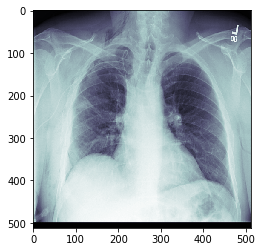

In [54]:
img=train_images[3]
plt.imshow(img,cmap=plt.cm.bone)

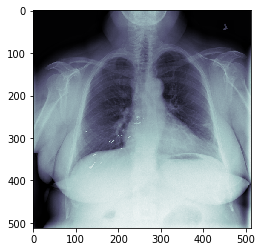

In [55]:
img=train_images[5]
plt.imshow(img,cmap=plt.cm.bone)

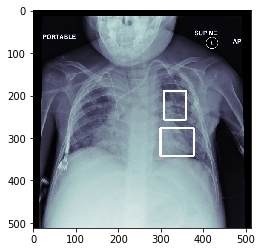

In [56]:
img=train_images[64]
plt.imshow(img,cmap=plt.cm.bone)

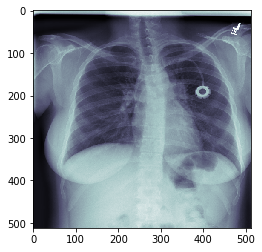

In [57]:
img=train_images[132]
plt.imshow(img,cmap=plt.cm.bone)

In [64]:
x_train = train_images.reshape(train_images.shape[0], Image_width, Image_height,Num_channels)
x_train.shape

(13342, 512, 512, 1)

# Exploratory Data Analysis

In [0]:
### Function for creating a .npy file for the labels data

In [0]:
def save_labels():
    labels = pd.read_csv('stage_2_train_labels.csv')
    #patset=[]
    patbbsetfin=[]
    patient_id=labels['patientId'].value_counts().index
    for pid in patient_id:
         patdtl=labels[labels['patientId']==pid]
         patbbset=[]
         for patrow in patdtl.iterrows():
             bbset=[]
             #print(patrow[1])
             bbset.append(patrow[1][1])
             bbset.append(patrow[1][2])
             bbset.append(patrow[1][3])
             bbset.append(patrow[1][4])
             patbbset.append(bbset) 
         patbbsetfin.append([pid, patbbset, patrow[1]['Target']])

    patbbsetfinarr=np.array(patbbsetfin)
    np.save('patient_labels.npy', patbbsetfinarr) 

In [0]:
### Load the .npy file and create a dictionary

In [0]:
import numpy as np
newpatarr=np.load('patient_labels.npy')
dictpatient={}
dictbboxtarget={}
for row in newpatarr:
    j=0
    dictbbox={}
    for bbox in row[1]:
        i=0
        dictcoord={}
        for coord in bbox:
            if i==0:
                x=coord
            if i==1:
                y=coord
            if i==2:
                width=coord
            if i==3:
                height=coord
            i=i+1
        dictcoord={'x' : x, 'y' : y, 'width' : width, 'height' : height} 
        j=j+1    
        dictbbox[j]=dictcoord
    bbox=dictbbox    
    dictbboxtarget={'bbox':bbox, 'target':row[2]}
    dictpatient[row[0]]=dictbboxtarget

In [0]:
count_0=0 #Count of records with target value 0
count_1=0 # Count of records with target value 1
count_4_bb=0 # Count of records with target value 1 and 4 bounding boxes
count_3_bb=0 # Count of records with target value 1 and 3 bounding boxes
count_2_bb=0 # Count of records with target value 1 and 2 bounding boxes
count_1_bb=0 # Count of records with target value 1 and 1 bounding box
count_4_bb_fake=0 # Count of records with target value 0 and 4 bounding boxes
count_3_bb_fake=0 # Count of records with target value 0 and 3 bounding boxes
count_2_bb_fake=0 # Count of records with target value 0 and 2 bounding boxes
count_1_bb_fake=0 # Count of records with target value 0 and 1 bounding boxes
for k in dictpatient.keys():
    if dictpatient[k]['target'] == 0:
        count_0=count_0+1
        if len(dictpatient[k]['bbox'])==4:
            count_4_bb_fake=count_4_bb+1
        if len(dictpatient[k]['bbox'])==3:
            count_3_bb_fake=count_3_bb+1
        if len(dictpatient[k]['bbox'])==2:
            count_2_bb_fake=count_2_bb+1
        if len(dictpatient[k]['bbox'])==1:
            count_1_bb_fake=count_1_bb+1
            #print(dictpatient[k]['bbox'])
        
    else:    
        count_1=count_1+1
        
        if len(dictpatient[k]['bbox'])==4:
            count_4_bb=count_4_bb+1
        if len(dictpatient[k]['bbox'])==3:
            count_3_bb=count_3_bb+1
        if len(dictpatient[k]['bbox'])==2:
            count_2_bb=count_2_bb+1
        if len(dictpatient[k]['bbox'])==1:
            count_1_bb=count_1_bb+1

In [0]:
print('count_0: ' + str(count_0) + ' count_1: ' + str(count_1))
print('count_1_bb: ' + str(count_1_bb) + ' count_2_bb: ' + str(count_2_bb) + ' count_3_bb: ' + str(count_3_bb) + ' count_4_bb: ' + str(count_4_bb))
print('count_1_bb_fake: ' + str(count_1_bb_fake) + ' count_2_bb_fake: ' + str(count_2_bb_fake) + ' count_3_bb_fake: ' + str(count_3_bb_fake) + ' count_4_bb_fake: ' + str(count_4_bb_fake))

count_0: 20672 count_1: 6012
count_1_bb: 2614 count_2_bb: 3266 count_3_bb: 119 count_4_bb: 13
count_1_bb_fake: 2615 count_2_bb_fake: 0 count_3_bb_fake: 0 count_4_bb_fake: 0


# EDA

# 1) No of patients with target class 1 is 6012 and class 0 is 20672. There is a huge class imbalance.
# 2) Where target class = 1, patients with 2 bboxes are the most at 3266 followed by patients with 1bbox at 2614. Patients with 3 and 4 bboxes are negligible at 119 and 13 respectively.
# 3) Where target class = 0, there are 2615 records with a bbox. Need to check this data.

In [0]:
for k in dictpatient.keys():
    if dictpatient[k]['target'] == 0:
        if len(dictpatient[k]['bbox'])>0:
            print(dictpatient[k]['bbox'])

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': nan, 'y': nan, 'width': nan, 'height': nan}}
{1: {'x': 

# The records mentioned at #3 above have all bounding box cooridnates as nan. We can ignore these bboxes